# 📘 Métodos Numéricos  
### 🧮 Trabajo práctico: *Splines Cúbicos*

---

👤 **Estudiante:** Matthew Cedeño  
👨‍🏫 **Profesor:** Jonathan Zea  
📅 **Fecha:** 31 de mayo de 2025  

---

### 🎯 Tema: Interpolación con Splines Cúbicos

> *“Si he logrado ver más lejos, ha sido porque me he subido a hombros de gigantes.”*  
> — **Isaac Newton** 🧠✨

---

🧠 *¡Vamos más allá del cálculo, con precisión y elegancia matemática!*

Link repositorio : https://github.com/MatthewC-20/Deber07.git


In [13]:
def spline_cubico_natural(xs, ys):
    n = len(xs) - 1  # número de intervalos

    # Paso 1: Calcular h[i]
    h = [xs[i+1] - xs[i] for i in range(n)]

    # Paso 2: Calcular alpha[i]
    alpha = [0.0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (ys[i+1] - ys[i]) - (3/h[i-1]) * (ys[i] - ys[i-1])

    # Paso 3: Resolver sistema tridiagonal para c[i]
    l = [1.0] + [0.0] * n
    mu = [0.0] * (n + 1)
    z = [0.0] * (n + 1)
    for i in range(1, n):
        l[i] = 2 * (xs[i+1] - xs[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]
    l[n] = 1.0
    z[n] = 0.0
    c = [0.0] * (n + 1)

    # Paso hacia atrás para calcular c[i]
    for j in reversed(range(n)):
        c[j] = z[j] - mu[j] * c[j+1]

    # Paso 4: Calcular b[i], d[i], a[i]
    b = [0.0] * n
    d = [0.0] * n
    a = ys[:-1]  # a[i] = y[i]
    for i in range(n):
        b[i] = (ys[i+1] - ys[i])/h[i] - h[i]*(2*c[i] + c[i+1])/3
        d[i] = (c[i+1] - c[i]) / (3*h[i])

    # Salida: lista de coeficientes (a, b, c, d) para cada tramo
    coeficientes = []
    for i in range(n):
        coef = (a[i], b[i], c[i], d[i], xs[i])
        coeficientes.append(coef)
    
    return coeficientes


In [14]:
# Puntos de ejemplo
xs = [0, 1, 2]
ys = [1, 5, 3]

# Calcular los splines
splines = spline_cubico_natural(xs, ys)

# Mostrar resultados
for i, (a, b, c, d, x0) in enumerate(splines):
    print(f"Spline {i}: S(x) = {a:.2f} + {b:.2f}(x - {x0}) + {c:.2f}(x - {x0})^2 + {d:.2f}(x - {x0})^3")


Spline 0: S(x) = 1.00 + 5.50(x - 0) + 0.00(x - 0)^2 + -1.50(x - 0)^3
Spline 1: S(x) = 5.00 + 1.00(x - 1) + -4.50(x - 1)^2 + 1.50(x - 1)^3


In [15]:
def spline_cubico_clamped_2p(x0, y0, x1, y1, fp0, fpn):
    h = x1 - x0
    a = y0
    b = fp0

    delta_y = y1 - y0 - b * h
    delta_fp = fpn - b

    d = (delta_fp - (2 * delta_y / h)) / (h ** 2)
    c = (delta_y - d * h ** 3) / (h ** 2)

    return a, b, c, d, x0

# Datos del problema
x0, y0 = -1, 1
x1, y1 = 1, 3
fp0 = 1
fpn = 2

# Calcular spline
a, b, c, d, base = spline_cubico_clamped_2p(x0, y0, x1, y1, fp0, fpn)

# Mostrar resultado
print(f"S(x) = {a:.2f} + {b:.2f}(x - ({base})) + {c:.2f}(x - ({base}))^2 + {d:.2f}(x - ({base}))^3")


S(x) = 1.00 + 1.00(x - (-1)) + -0.50(x - (-1))^2 + 0.25(x - (-1))^3


3. Completar función alpha 

In [16]:
import sympy as sym

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Expr]:
    """
    Cubic spline interpolation S_j. Every two points are interpolated by a cubic polynomial
    S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3

    xs must be different but not necessarily ordered nor equally spaced.

    Parameters:
    - xs, ys: points to be interpolated

    Return:
    - List of symbolic expressions for the cubic spline interpolation.
    """
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    
    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]
    
    # Paso 1: Vector alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1] - ys[i]) - 3/h[i-1]*(ys[i] - ys[i-1])
    
    # Paso 2: Solución del sistema tridiagonal
    l = [1] + [0]*(n)
    mu = [0]*(n+1)
    z = [0]*(n+1)
    
    for i in range(1, n):
        l[i] = 2*(xs[i+1] - xs[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    
    l[n] = 1
    z[n] = 0
    
    # Paso 3: Coeficientes
    a = ys[:]
    b = [0]*n
    c = [0]*(n+1)
    d = [0]*n
    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
    
    # Paso 4: Crear las expresiones simbólicas
    x = sym.Symbol('x')
    splines = []
    for j in range(n):
        sj = a[j] + b[j]*(x - xs[j]) + c[j]*(x - xs[j])**2 + d[j]*(x - xs[j])**3
        splines.append(sym.simplify(sj))
    
    return splines


4. Usando la función anterior complete los siguientes splines 
 xs = [1,2,3]
 ys = [2,3,5]

S_0(x) = 0.75*x + 0.25*(x - 1)**3 + 1.25
S_1(x) = -0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0


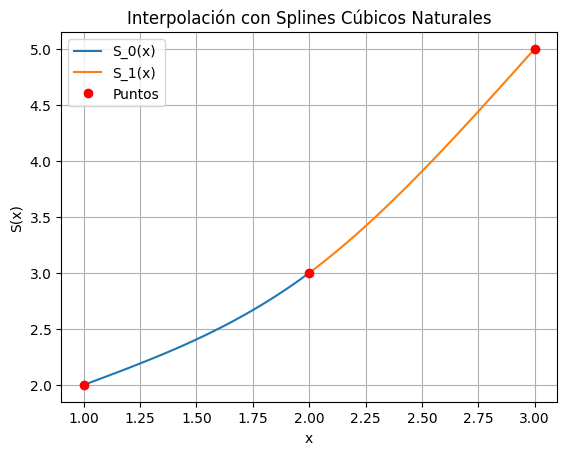

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Puntos de ejemplo
xs = [1, 2, 3]
ys = [2, 3, 5]

# Obtener los splines simbólicos
splines = cubic_spline(xs, ys)

# Imprimir cada spline
x = sym.Symbol('x')
for i, s in enumerate(splines):
    print(f"S_{i}(x) = {s}")

# Graficar los splines
x_vals = np.linspace(min(xs), max(xs), 500)
y_vals = []

for i in range(len(splines)):
    s_func = sym.lambdify(x, splines[i], modules='numpy')
    x_i = np.linspace(xs[i], xs[i+1], 100)
    y_i = s_func(x_i)
    plt.plot(x_i, y_i, label=f"S_{i}(x)")

# Puntos originales
plt.plot(xs, ys, 'ro', label="Puntos")

plt.title("Interpolación con Splines Cúbicos Naturales")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.legend()
plt.grid(True)
plt.show()


S_0(x) = 1.0*x**3 + 1.0*x - 1.0
S_1(x) = -3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0
S_2(x) = 2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0


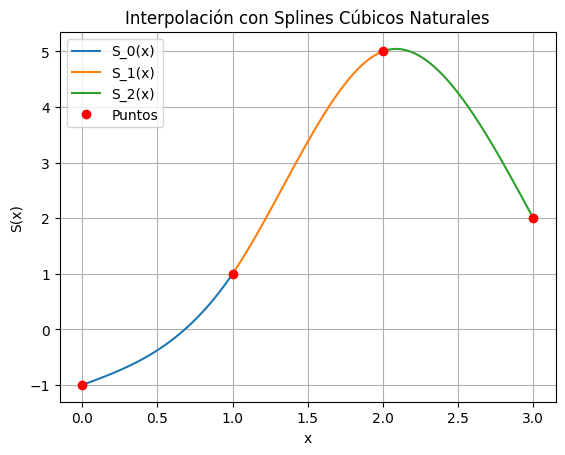

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Puntos de ejemplo
xs = [0,1, 2, 3]
ys = [-1,1,5 , 2]

# Obtener los splines simbólicos
splines = cubic_spline(xs, ys)

# Imprimir cada spline
x = sym.Symbol('x')
for i, s in enumerate(splines):
    print(f"S_{i}(x) = {s}")

# Graficar los splines
x_vals = np.linspace(min(xs), max(xs), 500)
y_vals = []

for i in range(len(splines)):
    s_func = sym.lambdify(x, splines[i], modules='numpy')
    x_i = np.linspace(xs[i], xs[i+1], 100)
    y_i = s_func(x_i)
    plt.plot(x_i, y_i, label=f"S_{i}(x)")

# Puntos originales
plt.plot(xs, ys, 'ro', label="Puntos")

plt.title("Interpolación con Splines Cúbicos Naturales")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.legend()
plt.grid(True)
plt.show()


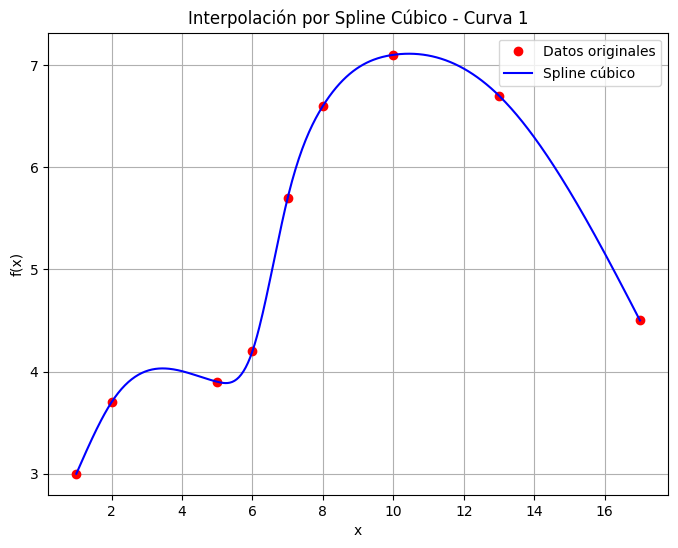

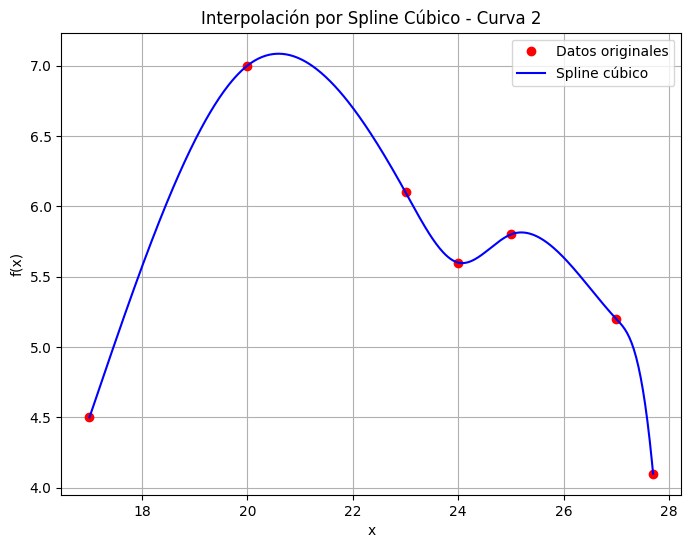

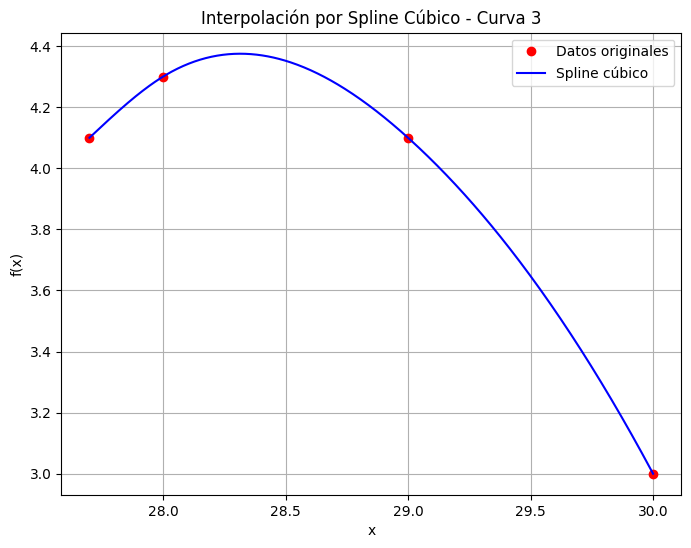

In [19]:
curves = {
    "Curva 1": {
        "xs": [1, 2, 5, 6, 7, 8, 10, 13, 17],
        "ys": [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5],
        "d0": 1.0,
        "dn": -0.67,
    },
    "Curva 2": {
        "xs": [17, 20, 23, 24, 25, 27, 27.7],
        "ys": [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1],
        "d0": 3.0,
        "dn": -4.0,
    },
    "Curva 3": {
        "xs": [27.7, 28, 29, 30],
        "ys": [4.1, 4.3, 4.1, 3.0],
        "d0": 0.33,
        "dn": -1.5,
    },
}

for curve_name, data in curves.items():
    xs = data["xs"]
    ys = data["ys"]
    d0 = data["d0"]
    dn = data["dn"]
    splines = cubic_spline_clamped(xs, ys, d0, dn)

    x_vals = np.linspace(min(xs), max(xs), 500)
    y_vals = []

    for x_val in x_vals:
        for i in range(len(xs) - 1):
            if xs[i] <= x_val <= xs[i + 1]:
                y_vals.append(sym.lambdify(sym.Symbol("x"), splines[i])(x_val))
                break

    plt.figure(figsize=(8, 6))
    plt.plot(xs, ys, "o", label="Datos originales", color="red")
    plt.plot(x_vals, y_vals, label="Spline cúbico", color="blue")
    plt.title(f"Interpolación por Spline Cúbico - {curve_name}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()